In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DC_test_1 = {
    "V": np.array([2.0, 2.3, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]) , 
    "I": np.array([1.0, 1.0, 4.5, 18.5, 53.0, 125.0, 265.0, 500.0]) ,
    "comment": "DC test 1, pre-repair",
    "max_top": 1.0e3
}

DC_test_2 = {
    "V": np.array([1.08, 2.02, 2.10, 2.20, 2.31, 2.42, 2.50, 2.60, 2.71, 2.80, 2.91, 3.01]) , 
    "I": np.array([10, 10, 10, 10, 10, 10, 10, 30, 70, 160, 390, 500]) ,
    "comment": "DC test 2, pre-repair",
    "max_top": 1.7e3
}

(0.1, 2000.0)

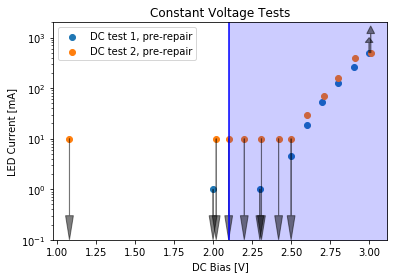

In [3]:
fig = plt.figure()
ax0 = fig.gca()

ax0.set_xlabel("DC Bias [V]")
ax0.set_ylabel("LED Current [mA]")
ax0.set_title("Constant Voltage Tests")

ax0.scatter(DC_test_1["V"],DC_test_1["I"],label=DC_test_1["comment"],
           linestyle="None")
ax0.scatter(DC_test_2["V"],DC_test_2["I"],label=DC_test_2["comment"],
           linestyle="None")

## Lower limits
ax0.arrow(DC_test_1["V"][-1], DC_test_1["I"][-1], 
         0.0, DC_test_1["max_top"]-DC_test_1["I"][-1],
         length_includes_head=True,
         head_width=0.05,
         head_length=200.0,
         color='k',alpha=0.5)

ax0.arrow(DC_test_2["V"][-1], DC_test_2["I"][-1], 
         0.0, DC_test_2["max_top"]-DC_test_2["I"][-1],
         length_includes_head=True,
         head_width=0.05,
         head_length=500.0,
         color='k',alpha=0.5)

## Upper limits
ax0.arrow(DC_test_1["V"][0], DC_test_1["I"][0], 
         0.0, 0.1-DC_test_1["I"][0],
         length_includes_head=True,
         head_width=0.05,
         head_length=0.2,
         color='k',alpha=0.5)

ax0.arrow(DC_test_1["V"][1], DC_test_1["I"][1], 
         0.0, 0.1-DC_test_1["I"][1],
         length_includes_head=True,
         head_width=0.05,
         head_length=0.2,
         color='k',alpha=0.5)

for i in np.arange(7):
    ax0.arrow(DC_test_2["V"][i], DC_test_2["I"][i], 
         0.0, 0.1-DC_test_2["I"][i],
         length_includes_head=True,
         head_width=0.05,
         head_length=0.2,
         color='k',alpha=0.5)

ax0.legend(loc='best')
ax0.set_yscale('log')
ax0.set_ylim([0.1,2e3])

ax0.axvline(x=2.10,color='b')
xlim = ax0.get_xlim()
ylim = ax0.get_ylim()
ax0.fill_between([2.10, xlim[1]], y1=ylim[0], y2=ylim[1], color='b', alpha=0.2)
ax0.set_xlim(xlim)
ax0.set_ylim(ylim)

In [4]:
Pulse_test_1 = {
    "V": np.array([0.00, 1.01, 2.00, 2.20, 2.30, 2.40, 2.51, 2.61, 2.71, 2.81, 2.91, 3.00, 3.11, 3.21, 3.30, 3.40, 3.50, 3.60, 3.71, 3.80, 3.91, 4.01, 4.24, 4.50, 4.74, 5.02]) , 
    "mV": np.array([38.4, 38.4, 38.4, 38.4, 38.4, 39.2, 44.8, 54, 66, 78, 91.6, 103, 118, 132, 144, 159, 173, 189, 204, 217, 233, 249, 284, 321, 359, 402]) , 
    "comment": "Post-repair",
    "Rsense": 7.5
}
Pulse_test_1["mA"] = Pulse_test_1["mV"]/Pulse_test_1["Rsense"]

Text(0, 0.5, 'Calculated LED Current [mA]')

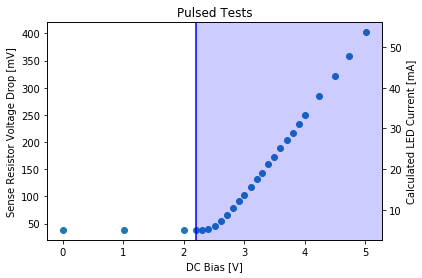

In [5]:
fig = plt.figure()
ax0 = fig.gca()

ax0.set_xlabel("DC Bias [V]")
ax0.set_ylabel("Sense Resistor Voltage Drop [mV]")
ax0.set_title("Pulsed Tests")

ax0.scatter(Pulse_test_1["V"],Pulse_test_1["mV"],label=Pulse_test_1["comment"],
           linestyle="None")

ax0.axvline(x=2.20,color='b')
xlim = ax0.get_xlim()
ylim = ax0.get_ylim()
ax0.fill_between([2.20, xlim[1]], y1=ylim[0], y2=ylim[1], color='b', alpha=0.2)
ax0.set_xlim(xlim)
ax0.set_ylim(ylim)

ax1 = ax0.twinx()
ax1.set_ylim(np.array(ylim)/Pulse_test_1["Rsense"])
ax1.set_ylabel("Calculated LED Current [mA]")